# Algorithme des arbres de décision pour  un problème de classification

Nous allons travailler avec le jeu de données breast_cancer,pour plus d'informations cliquer sur ce lien https://goo.gl/U2Uwz2

## Chargement des bibiliothèque nécessaires

## Vérifier la version de sklearn

In [1]:
import sklearn
print('La version de sklearn :', sklearn.__version__)

La version de sklearn : 0.24.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

- Créer une variable `df` à qui vous affectez le jeux de données breast_cancer

In [3]:
df = load_breast_cancer()

- Afficher df

In [4]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- Quel est le type de df ? 

c'est un dictionnaire

- Afficher les clés de df

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Extraire de `df` : les observations dans un tableau 2D `X` et les classes dans un tableau 1D `y`

In [9]:
X = df.data
y = df.target
X
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Diviser l'ensemble des observations X et l'ensemble de classes Y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 70% de l'ensemble initial
- un sous-ensemble de test : 30% de l'ensemble initial
##### __Indication__ : Fixer à 3 le générateur aléatoire

In [11]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
# your code
X_trainset.shape
y_trainset.shape

(398,)

In [12]:
print(X_trainset)
print(y_testset)

[[1.227e+01 2.997e+01 7.742e+01 ... 0.000e+00 2.409e-01 6.743e-02]
 [1.184e+01 1.894e+01 7.551e+01 ... 6.913e-02 2.535e-01 7.993e-02]
 [2.009e+01 2.386e+01 1.347e+02 ... 1.923e-01 3.294e-01 9.469e-02]
 ...
 [1.795e+01 2.001e+01 1.142e+02 ... 1.185e-01 4.882e-01 6.111e-02]
 [1.955e+01 2.877e+01 1.336e+02 ... 1.941e-01 2.818e-01 1.005e-01]
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]]
[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1]


#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.


In [14]:
from sklearn.tree import DecisionTreeClassifier

#### Afficher la description de la classe __`DecisionTreeClassifier`__

In [15]:
DecisionTreeClassifier?

 
#### Créer une instance  instancier __`dt`__  de la classe  __`DecisionTreeClassifier`__ en fixant à __zéro__  __`random_state`__. Garder l'indice de Gini comme __`criterion`__ par defaut. 

In [17]:
decisionTree = DecisionTreeClassifier(random_state=0)
decisionTree 

DecisionTreeClassifier(random_state=0)

#### Entrainer le modèle __`dt`__ sur les sous-ensembles d'apprentissage (observations et classes) 

In [18]:
decisionTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(random_state=0)

#### Calculer les scores d'apprentissage et de test relatifs au modèle dt

In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", decisionTree.score(X_testset,y_testset))


DecisionTrees's Accuracy:  0.9532163742690059


Comme on peut le voir sur l'ensemble d'entraînement, le score de précision est de 1,0000, ce qui est un indicateur de sur-apprentissage.

#### Tracer la matrice de confusion de __`dt`__

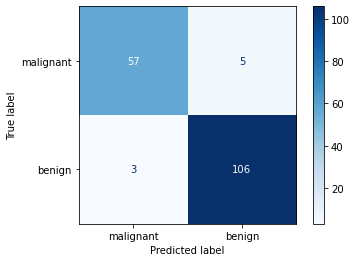

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decisionTree, X_testset, y_testset,display_labels=df.target_names,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`dt`__

In [36]:
from sklearn.metrics import classification_report
y_pred=decisionTree.predict(X_testset)
print(classification_report(y_testset,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.950000  0.919355  0.934426        62
           1   0.954955  0.972477  0.963636       109

    accuracy                       0.953216       171
   macro avg   0.952477  0.945916  0.949031       171
weighted avg   0.953158  0.953216  0.953046       171



### Afficher l'importance de chaque variable

In [42]:
names= ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 
        'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 
        'mean fractal dimension','radius error', 'texture error', 'perimeter error', 
        'area error','smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error','fractal dimension error', 'worst radius', 
        'worst texture','worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 
        'worst fractal dimension']

In [44]:
#features importances
for var,importance in zip (names,decisionTree.feature_importances_):
    if importance !=0:
        print(var,'=', importance )

mean radius = 0.0071326164874551965
mean texture = 0.03566308243727598
mean compactness = 0.0071326164874551965
mean concavity = 0.01577405569341056
mean concave points = 0.016343816469423122
area error = 0.013887146841606846
worst texture = 0.055216083966662534
worst area = 0.7191021981181767
worst concave points = 0.1297483834985339


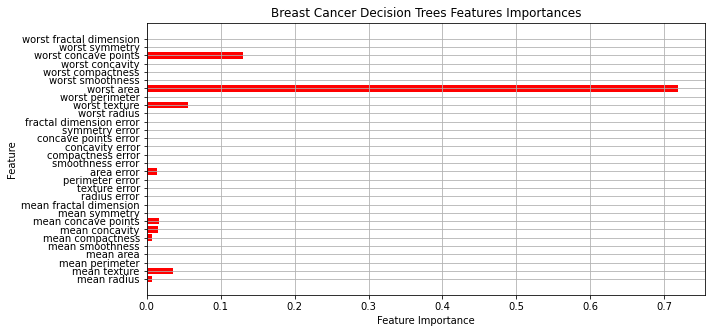

In [46]:
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(10,5))
    plt.barh(range(len(names)), model.feature_importances_, align='center', color='red')
    plt.yticks(np.arange(len(names)), names)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.grid(True)
breast_cancer_feature_importances_plot(decisionTree)
plt.show()


#### Exécuter le code ci-dessous pour afficher l'arbre de décision

In [52]:
#%matplotlib
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(decisionTree, feature_names=names, class_names=df.target_names, filled=True)
plt.show()

#### Exécuter le code ci-dessous pour afficher l'arbre sous forme de régles de décision

In [54]:
from sklearn.tree import export_text
print(export_text(decisionTree,feature_names=names,show_weights=True ))

|--- worst area <= 874.85
|   |--- worst concave points <= 0.16
|   |   |--- mean concave points <= 0.05
|   |   |   |--- area error <= 48.70
|   |   |   |   |--- worst texture <= 33.27
|   |   |   |   |   |--- weights: [0.00, 208.00] class: 1
|   |   |   |   |--- worst texture >  33.27
|   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |   |--- area error >  48.70
|   |   |   |   |--- mean compactness <= 0.06
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- mean compactness >  0.06
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- mean concave points >  0.05
|   |   |   |--- worst texture <= 29.20
|   |   |   |   |--- worst area <= 817.60
|   |   |   |   |   |--- weights: [0.00, 17.00] class: 1
|   |   |   |   |--- worst area >  817.60
|   |   |   |   |   |--- mean ra

#### Que pensez-vous de la complexité de l'arbre ?


#### L'arbre est trop long et difficile à interpreter. Pour faire face à ce problème on va essayer de régler les hyperparamètre de notre modèle (objectif de l'exercice 2).

#### Créer un dictionaire __`param_grid`__, en vue de configurer les deux hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 9

In [55]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}

#### Charger la méthode GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV


#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question 3. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [57]:
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid,cv=5)

#### Entrainer l'instance de modèle créé sur les sous-ensembles de données approprié.

In [58]:
grid.fit(X_trainset,y_trainset)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [59]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

#### Créer une instance __`final_model`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question 6

In [60]:
final_model=grid.best_estimator_


#### Entrainer __`final_model`__ sur le sous-ensemble de données approprié.

#### Evaluer la performance de final_model sur le sous-ensemble de données approprié

In [61]:
final_model.score(X_trainset,y_trainset)

0.9321608040201005

In [64]:
print(final_model.score(X_trainset,y_trainset))

0.9321608040201005


In [65]:
print(final_model.score(X_testset,y_testset))

0.8947368421052632


In [66]:
breast_cancer_feature_importances_plot(final_model)
plt.show()

#### tracer la matrice de confusion de __`final_model`__

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_testset, y_testset,display_labels=df.target_names,cmap=plt.cm.Blues)  
plt.show()

### Afficher le __`classification_report`__ de __`final_model`__

In [70]:
from sklearn.metrics import classification_report
y_pred=final_model.predict(X_testset)
print(classification_report(y_testset,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.797297  0.951613  0.867647        62
           1   0.969072  0.862385  0.912621       109

    accuracy                       0.894737       171
   macro avg   0.883185  0.906999  0.890134       171
weighted avg   0.906791  0.894737  0.896315       171



In [76]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#### Comparer la performance de ce modèle dont les hyperparamètres ont été réglés avec celui de dt sans réglage d'hyperparamètres

#### Afficher l'arbre de décision de __`final_model`__ et le compararer à celui de l'exercice 1.

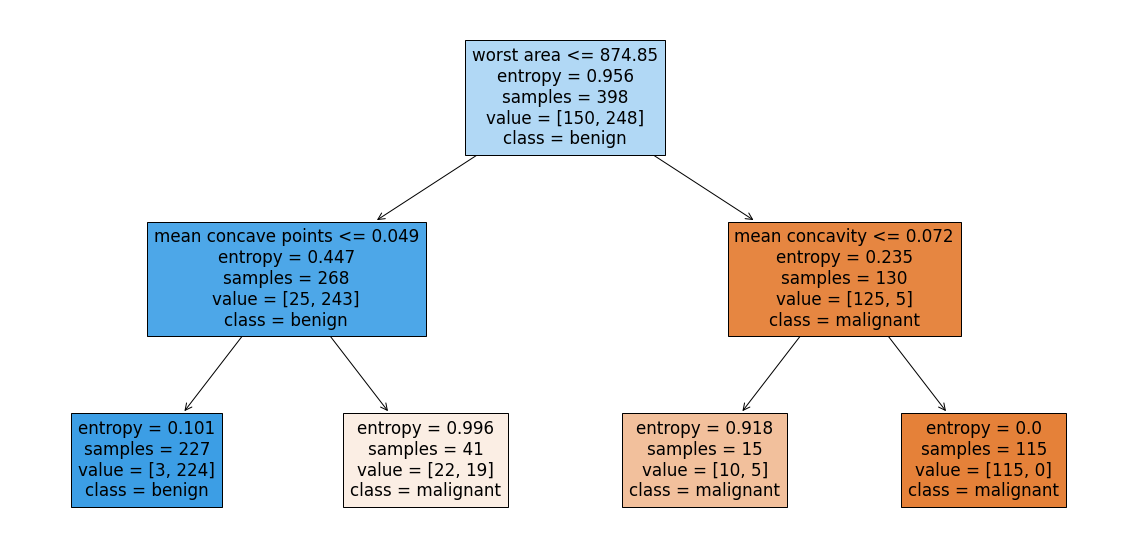

In [79]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(final_model, feature_names=names, class_names=df.target_names, filled=True)
plt.show()

#### Afficher l'arbre de décision de __`final_model`__ sous forme de règles de décision

In [ ]:
from sklearn.tree import export_text
print(export_text(final_model,feature_names=names,show_weights=True ))